In [172]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as col
#%matplotlib inline

In [164]:
%matplotlib notebook

In [170]:
# Define colormap
def mkcmap(): 
    white = '#ffffff'
    black = '#000000'
    yellow = '#ffff00'
    red = '#A60628'
    #red = '#cc0000'
    #blue = '#0000ff'
    blue='#6280E2'
    green = '#467821'
    #green = '#009933' 
    purple = '#7A68A6'
    anglemap = col.LinearSegmentedColormap.from_list('anglemap', 
                                                     [green, red, yellow, blue, green], N=256, gamma=1)
    return anglemap

anglemap = mkcmap()

In [174]:
dat = np.loadtxt('spins.dat')
L = dat.shape[1]
dat = dat.reshape(-1,L,L)

In [175]:
x = np.arange(0,L)
y = np.arange(0,L)
xg, yg = np.meshgrid(x, y)

<IPython.core.display.Javascript object>


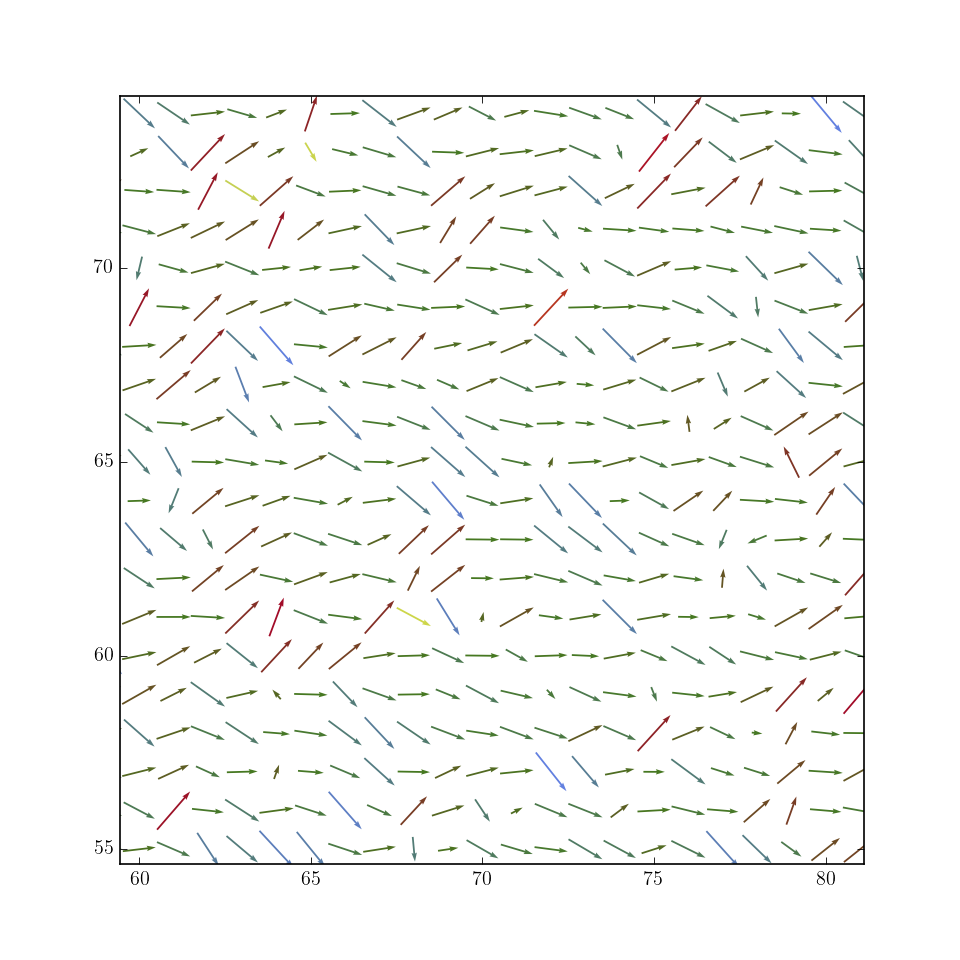

(0, 128)

In [176]:
fig, axe = plt.subplots(figsize=(8,8))
axe.quiver(x, y, np.cos(dat[0]), np.sin(dat[-1]), (dat[-1])%(2*np.pi), 
           pivot = 'middle', angles='xy', scale_units='xy', scale=1., cmap=anglemap)

axe.set_xlim([0,L])
axe.set_ylim([0,L])

In [42]:
import scipy as sp

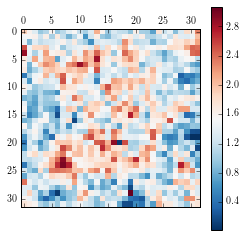

In [70]:
plt.matshow(dat[-1]%(np.pi));plt.colorbar()